In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


1. Try anti reccomender
2. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import re
import datetime
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action="ignore", category=DataConversionWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVR
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy import stats
from sklearn.cluster import AgglomerativeClustering

In [87]:
from artr_utilities import *

In [6]:
df = get_user_artworks_dataframe()
df2 = get_user_artworks_dataframe(420)

In [6]:
df.imagga_tags.unique()

TypeError: unhashable type: 'list'

In [107]:
df2.describe(include="all")

,yearEarly,techniques,materials,iconClass,imagga_tags_text,dissimilarity,contrast,energy,correlation,wiki_text,movement_text,imagga_tags,cnn_features,description,liked,movement,all_text
count,461.000000,461,461,461,461,461.000000,461.000000,461.000000,461.000000,461,461,461,461,461,461.000000,93,461
unique,NaN,5,34,154,302,NaN,NaN,NaN,NaN,141,8,329,461,167,NaN,10,375
top,NaN,,canvas oil paint (paint),,,NaN,NaN,NaN,NaN,,,[],"[9.850824426393956e-06, 3.9892260247142985e-05...",,NaN,Renaissance,--
freq,NaN,413,235,306,132,NaN,NaN,NaN,NaN,293,374,132,1,295,NaN,38,76
mean,1730.646421,NaN,NaN,NaN,NaN,10.660025,354.557564,0.027508,0.890047,NaN,NaN,NaN,NaN,NaN,0.718004,NaN,NaN
std,113.669347,NaN,NaN,NaN,NaN,4.477766,297.656515,0.030240,0.088473,NaN,NaN,NaN,NaN,NaN,0.450460,NaN,NaN
min,1435.000000,NaN,NaN,NaN,NaN,1.697804,16.359738,0.006825,0.399280,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,1641.000000,NaN,NaN,NaN,NaN,7.683136,171.390187,0.015531,0.861733,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1683.000000,NaN,NaN,NaN,NaN,9.965661,267.754464,0.019932,0.912256,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,1850.000000,NaN,NaN,NaN,NaN,12.600554,427.122232,0.028299,0.949008,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [27]:
print(df['description'])

0                                                       
1                                                       
2                                                       
3                                                       
4                                                       
                             ...                        
824    Like so many artists, Sweerts undertook a stud...
825                                                     
826    Before Segers’ signature was discovered on thi...
827                                                     
828                                                     
Name: description, Length: 829, dtype: object


In [21]:
e = LabelEncoder()
df['movement'] = df['movement'].apply(lambda x: 'NaN' if pd.isnull(x) else x)
df["movement_encoded"] = e.fit_transform(df["movement"])
df.describe()

,yearEarly,dissimilarity,contrast,energy,correlation,liked,movement_encoded
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,1708.583836,10.746235,360.926240,0.033533,0.892030,0.557298,5.088058
std,109.912072,4.331924,316.054558,0.052032,0.081315,0.497006,1.401591
min,1250.000000,1.545939,16.359738,0.006825,0.431178,0.000000,0.000000
25%,1637.000000,7.734077,172.180043,0.015005,0.865560,0.000000,5.000000
50%,1672.000000,10.059999,272.571431,0.019636,0.911673,1.000000,5.000000
75%,1809.000000,12.862365,437.183579,0.028348,0.947587,1.000000,5.000000
max,1948.000000,42.783920,3956.298254,0.396080,0.994323,1.000000,11.000000


     yearEarly                                        description techniques  \
0         1638  Lutma must have been proud of his salt cellars...              
1         1672  The Amsterdam Town Hall (now the Royal Palace)...              
2         1629  When Haarlem sided with the Dutch Revolt in 15...              
3         1695  In early 1694 some 30 Dutch warships set sail ...              
4         1640                                               None              
..         ...                                                ...        ...   
456       1862  The overwintering of Willem Barents and his cr...   painting   
457       1535  Tyrolean glass painters often used engravings ...              
458       1685  Jan Weenix painted his animal pieces in a high...              
459       1893  The Zaandam painter Jan Verkade was a member o...   painting   
460       1680                                               None   painting   

                                       

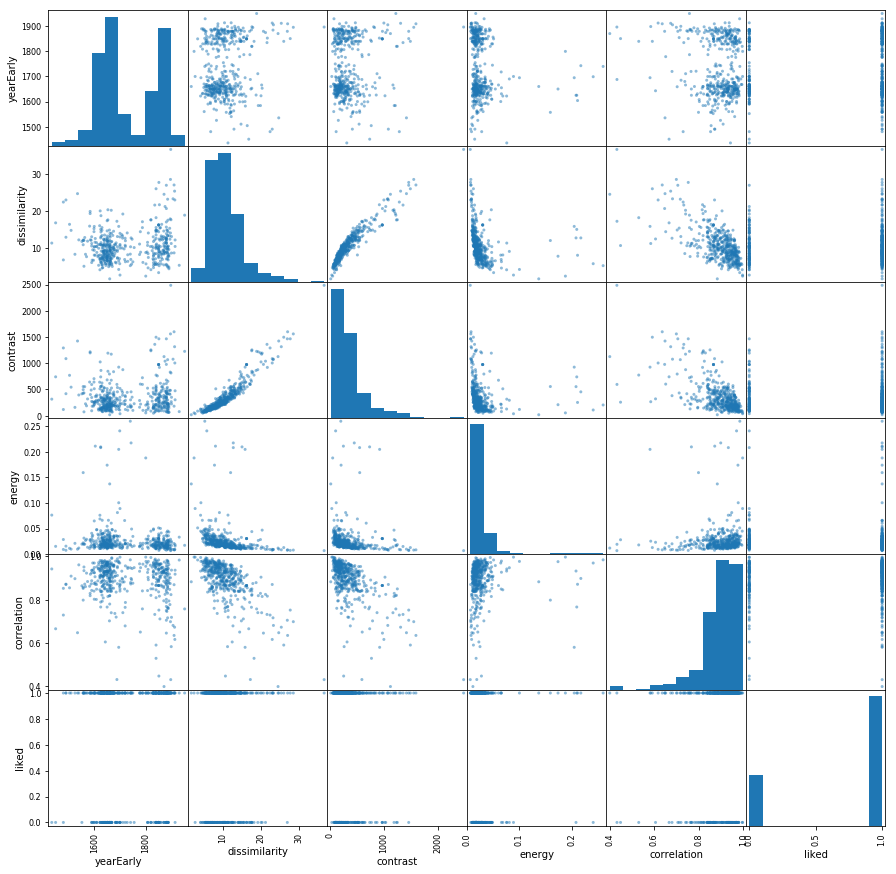

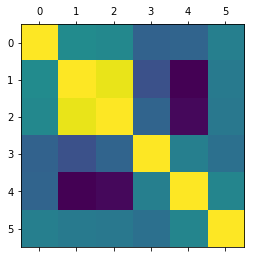

In [94]:
scatter_matrix(df, figsize=(15, 15))
print(df)
plt.matshow(df.corr())
plt.show()

In [7]:
df_dnn_features = []
for index, row in df.iterrows():
    l = {}
    for i in range(4096):
        l[str(i)] = df["cnn_features"][index][i]
    l["liked"] = row["liked"]
    df_dnn_features.append(l)
df_dnn_features = pd.DataFrame(df_dnn_features)
df2_dnn_features = []
for index, row in df2.iterrows():
    l = {}
    for i in range(4096):
        l[str(i)] = df2["cnn_features"][index][i]
    l["liked"] = row["liked"]
    df2_dnn_features.append(l)
df2_dnn_features = pd.DataFrame(df2_dnn_features)

In [57]:
# print(X.values[1])

In [8]:
# plt.matshow(X.corr())
# plt.show()
# plt.matshow(X2.corr())
# plt.show()
liked = list(df_dnn_features.corr()["liked"][:-1])
liked2 = list(df2_dnn_features.corr()["liked"][:-1])
best = sorted( [ x for x in liked], reverse=True )[:20]
best2 = sorted( [ x for x in liked2], reverse=True )[:20]
print(best)
print(best2)

[0.10962322093191335, 0.1000623631805896, 0.08981611534573376, 0.08349021563389226, 0.08240906398623908, 0.08035899021409648, 0.07893275309970621, 0.07818419522485547, 0.07693980597865478, 0.07357347814519546, 0.07111920353950923, 0.0694575447936206, 0.0682201930959095, 0.0681126487972391, 0.06777739459468007, 0.06646068733842717, 0.06520878793444158, 0.06454781776139777, 0.06408824461731345, 0.06387192640625522]
[0.18532053752723443, 0.18520663669196882, 0.17964271615947694, 0.17748468992190589, 0.1754622388198676, 0.1721899760030734, 0.17162887277625216, 0.16845833473982877, 0.1684354264645829, 0.16425753292746903, 0.16026224820914578, 0.15922968977977636, 0.15694660407641428, 0.14793721175763366, 0.14746440497559044, 0.14731964437192854, 0.14088940250827153, 0.13838087625322723, 0.13754294263199707, 0.13713302259227855]


In [10]:
X = df_dnn_features
y = X['liked'].values


numeric_features = [str(i) for i in range(4096)] # all values
# numeric_features = [str(liked .index(i)) for i in best] # Only 20 best performing

# y = X['liked'].values

# numeric_features = [str(liked2.index(i)) for i in best2] # Only 20 best performing


preprocessor = ColumnTransformer([("num", StandardScaler(), numeric_features)], 
                                 remainder="drop")

pca = PCA(n_components = 30)
svd = TruncatedSVD(n_components=12)
mb = MiniBatchKMeans(n_clusters = 2)
svr = SVR(kernel='poly')
l = LogisticRegression()
sgd = SGDRegressor()

 
test_pipeline = Pipeline([("pre", preprocessor), ("pca", pca), ("est",  l)])

dummy_pipeline = Pipeline([("pre",preprocessor), ("pca", pca), ("est", DummyRegressor())])

means = []
runs = 20
for i in range(runs):
    X = X.take(np.random.permutation(len(X)))    
    mean = np.mean(cross_val_score(test_pipeline, X, y, scoring='neg_mean_absolute_error', cv=10))
    means.append(mean)

dummy_mean = np.mean(cross_val_score(dummy_pipeline, X, y ,scoring='neg_mean_absolute_error',  cv=10))

print("Dummy: ", end="")
print(dummy_mean)
print()

print("Average: ", end="")
print(sum(means)/runs)
print()


print("Old - Dummy: ", end="" )
print((sum(means)/runs) - dummy_mean)

Dummy: -0.4948081258970799

Average: -0.47347365070036246

Old - Dummy: 0.02133447519671744


In [78]:
numeric_features = [str(i) for i in range(460)] + ["yearEarly", "dissimilarity", "contrast", "correlation"] 
# numeric_features = [str(liked.index(i)) for i in best] # Only 20 best performing

# y = X['liked'].values

# numeric_features = [str(liked2.index(i)) for i in best2] # Only 20 best performing


X = pd.concat([df2, df2_dnn_features])
y = X['liked'].values

preprocessor = ColumnTransformer([("num", StandardScaler(), numeric_features)], 
                                 remainder="drop")

pca = PCA(n_components = 20)
svd = TruncatedSVD(n_components=12)
mb = MiniBatchKMeans(n_clusters = 2)
svr = SVR(kernel='poly')
l = LogisticRegression()
sgd = SGDRegressor()

 
test_pipeline = Pipeline([("pre", preprocessor), ("pca", pca), ("est",  l)])

dummy_pipeline = Pipeline([("pre",preprocessor), ("pca", pca), ("est", DummyRegressor())])

means = []
runs = 5
for i in range(runs):
    X = X.take(np.random.permutation(len(X)))    
    mean = np.mean(cross_val_score(test_pipeline, X, y, scoring='neg_mean_absolute_error', cv=10))
    means.append(mean)

dummy_mean = np.mean(cross_val_score(dummy_pipeline, X, y ,scoring='neg_mean_absolute_error',  cv=10))

print("Dummy: ", end="")
print(dummy_mean)
print()

print("Average: ", end="")
print(sum(means)/runs)
print()


print("Old - Dummy: ", end="" )
print((sum(means)/runs) - dummy_mean)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

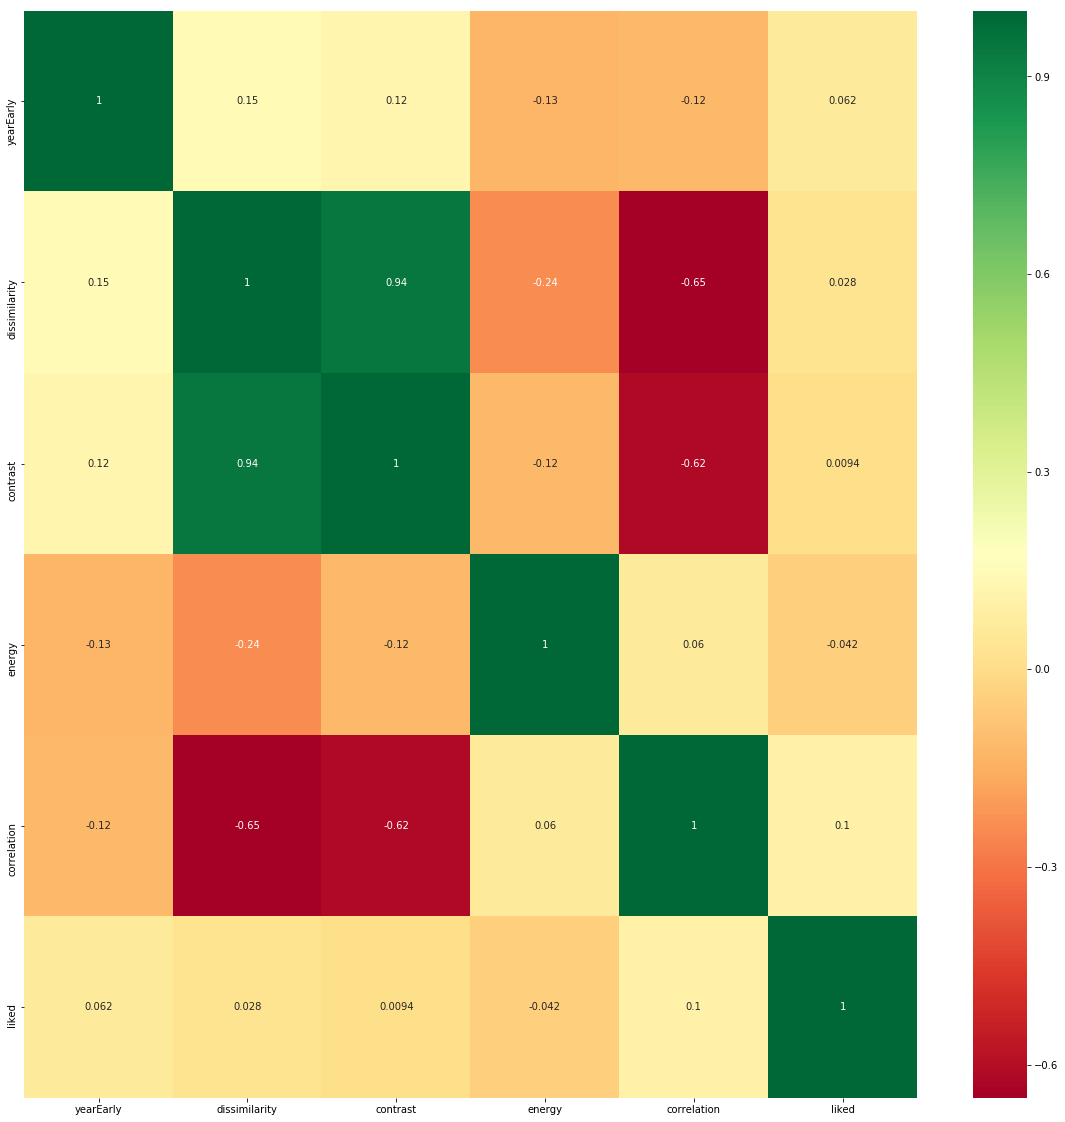

In [63]:
X = df.iloc[:,0:5] 
y = df.iloc[:,-1]   
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [47]:
Y = df['liked']
df['all_text'] = df[['wiki_text', 'movement_text']].agg('-'.join, axis=1)
df['all_text'] = df[['all_text', 'description']].agg('-'.join, axis=1)
# X = df['imagga_tags'].values.astype("U")
X = df['all_text']

cv = CountVectorizer(max_df=1.0, min_df=0.0, max_features=10000, stop_words='english')

X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(), mutual_info_classif(X_vec, Y, discrete_features=True)))
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
print(res)
print(len(res))
count = 0
for i in res.values():
    if i > 0.001:
        count +=1
print(count)

{'accepted': 6.75114360214335e-08, 'enjoyed': 6.75114360214335e-08, 'fort': 6.75114360214335e-08, 'hair': 6.75114360214335e-08, 'luke': 6.75114360214335e-08, 'oak': 6.75114360214335e-08, 'poor': 6.75114360214335e-08, 'successful': 6.75114360214335e-08, 'thought': 1.3652168649042062e-07, 'rivers': 1.080191129487762e-06, 'impressions': 2.2037154192855457e-06, 'madame': 2.28050731045093e-06, 'merisi': 2.28050731045093e-06, 'mistress': 2.28050731045093e-06, '19': 3.4540004295383064e-06, 'accuracy': 3.4540004295383064e-06, 'achievements': 3.4540004295383064e-06, 'acquire': 3.4540004295383064e-06, 'antique': 3.4540004295383064e-06, 'arranged': 3.4540004295383064e-06, 'captured': 3.4540004295383064e-06, 'contain': 3.4540004295383064e-06, 'cut': 3.4540004295383064e-06, 'female': 3.4540004295383064e-06, 'ideally': 3.4540004295383064e-06, 'informal': 3.4540004295383064e-06, 'james': 3.4540004295383064e-06, 'lies': 3.4540004295383064e-06, 'loose': 3.4540004295383064e-06, 'measuring': 3.4540004295

In [11]:
X = df
y = X["liked"].values

numeric_features = ["yearEarly", "dissimilarity", "contrast", "correlation"]
nominal_features = []

X['all_text'] = X[['wiki_text', 'movement_text', 'imagga_tags_text']].agg('-'.join, axis=1)
vectorizer = TfidfVectorizer(max_features=400, stop_words='english', lowercase=True, analyzer="word")

preprocessor = ColumnTransformer([("num", StandardScaler(), numeric_features),
                                       ("nom", OneHotEncoder(handle_unknown="ignore"), nominal_features),
                                       ("text", vectorizer, 'all_text')
                                 ],
                                       remainder="drop")

pca = PCA(n_components = 10)
svd = TruncatedSVD(n_components=12)
mb = MiniBatchKMeans(n_clusters = 2)
svr = SVR(kernel='poly')
l = LogisticRegression()
sgd = SGDRegressor()
skf = StratifiedKFold(10)

 
test_pipeline = Pipeline([("pre", preprocessor), ("est",  sgd)])

dummy_pipeline = Pipeline([("pre",preprocessor) ,("est", DummyRegressor())])

means = []
#I've only run this once here since it takes so long but in testing I used the mean of 10 runs.
runs = 20
for i in range(runs):
    X = X.take(np.random.permutation(len(X)))    
    mean = np.mean(cross_val_score(test_pipeline, X, y, scoring='neg_mean_absolute_error', cv=skf))
    means.append(mean)

dummy_mean = np.mean(cross_val_score(dummy_pipeline, X, y ,scoring='neg_mean_absolute_error',  cv=skf))

print("Dummy: ", end="")
print(dummy_mean)
print()

print("Average: ", end="")
print(sum(means)/runs)
print()


print("Old - Dummy: ", end="" )
print((sum(means)/runs) - dummy_mean)

Dummy: -0.49343514091609003

Average: -0.5217174226179634

Old - Dummy: -0.028282281701873357


In [29]:
vgg16_model = VGG16()
model = Sequential()
for layer in vgg16_model.layers[:]:
    model.add(layer)

In [30]:
image_array = img_to_array(load_img("images/image.jpg", target_size=(224, 224)))
image_tensor_1 = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
image_tensor_1 = preprocess_input(image_tensor_1)
image_array = img_to_array(load_img("images/image_2.jpg", target_size=(224, 224)))
image_tensor_2 = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
image_tensor_2 = preprocess_input(image_tensor_2)
f1 = model.predict(image_tensor_1)[0].reshape(1, -1)
f2 = model.predict(image_tensor_2)[0].reshape(1, -1)
print(f1)
print(f1.shape, f2.shape)
print(cosine_similarity(f1, f2))


[[5.94901394e-06 5.82140547e-06 9.58749206e-06 1.90671051e-06
  4.95281438e-06 1.23147591e-04 5.06485463e-04 3.97865260e-05
  7.64797187e-06 1.13677049e-06 1.66986683e-05 6.29257374e-06
  2.53287635e-05 1.74669076e-05 3.96970063e-05 4.09907079e-06
  3.91145562e-07 6.17808973e-06 4.21635878e-06 6.43583553e-06
  3.78947357e-06 5.40439657e-07 8.53908716e-07 4.88574733e-06
  3.10290238e-06 1.36160190e-06 1.57833244e-06 1.31046920e-06
  7.97121629e-07 5.80246365e-07 2.67490614e-05 8.89634703e-06
  8.08542154e-06 2.00610048e-05 4.97826550e-05 2.26686188e-05
  6.91062160e-05 5.30000834e-05 9.31123395e-06 1.88175891e-05
  8.20270088e-07 2.63547190e-06 1.14539089e-05 6.24894456e-05
  1.17525333e-05 1.19908087e-04 2.88186266e-06 8.66659320e-06
  9.98940595e-05 5.27959710e-05 1.93297346e-05 1.55146608e-05
  2.94960478e-06 5.18852039e-06 1.29981359e-04 6.56502161e-05
  5.04870877e-06 1.87684896e-06 1.34777205e-04 5.77719402e-06
  3.31262825e-04 1.49202184e-03 2.78965512e-04 6.81588706e-03
  3.1044

In [120]:
vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
def build_network():
    network = Sequential()
    network.add(vgg16_base)
    vgg16_base.trainable = False
    network.add(Flatten())
    network.add(Dense(256, activation="relu"))
    network.add(Dense(1, activation="sigmoid"))
    network.compile(optimizer=RMSprop(lr=0.00003), loss="binary_crossentropy", metrics=["accuracy"])
    return network

In [121]:
network = build_network()
network.summary()
vgg16_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_____________________

In [2]:
images = get_user_images()
train_df, validate_df = train_test_split(images, test_size=.2, random_state=1)
train_df, test_df = train_test_split(train_df, test_size=.25, random_state=1)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

print(test_df.shape[0] // 30)
print(train_df.shape[0] // 30)

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "images/", 
    x_col='filename',
    y_col='liked',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=20
)

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "images/", 
    x_col='filename',
    y_col='liked',
    target_size=(224, 224),
    class_mode='categorical'
)

history = network.fit_generator(
    train_generator, 
    epochs=3,
    validation_data=test_generator,
    validation_steps=test_df.shape[0]//30,
    steps_per_epoch=train_df.shape[0]//30
)

NameError: name 'get_user_images' is not defined

In [91]:
X, ids = get_artwork_cnn_frame()
print("Computing groups")
clustering = AgglomerativeClustering(n_clusters=100).fit(X)
print("Converting groupings to list")

Computing groups
Converting groupings to list


In [92]:
groups = [{} for i in range(100)]

labels = clustering.labels_

for i in range(len(labels)):
    group = labels[i]
    work_id = ids[i]
    values = list(X[i])
    groups[group][work_id] = values

In [93]:
most_different_items = []
for group in groups:
    values = list(group.values())
    average_point = [np.average(col) for col in zip(*values)]
    distances = []
    for item in group.values():
        distances.append(euclidean(average_point, item))
    min_item = distances.index(min(distances))
    most_different_items.append(list(group.keys())[min_item])
print(most_different_items)

['en-SK-A-854', 'en-SK-A-3426', 'en-SK-C-87', 'en-SK-A-4160', 'en-SK-A-4254-9', 'en-SK-A-4524', 'en-SK-A-1474', 'en-SK-A-1023', 'en-SK-A-17', 'en-SK-A-2001', 'en-SK-A-2256', 'en-SK-A-2026', 'en-SK-A-5039', 'en-SK-A-419', 'en-SK-A-316', 'en-SK-A-917', 'en-SK-A-4262', 'en-SK-A-1338', 'en-SK-A-3074', 'en-SK-A-5', 'en-SK-A-1973', 'en-SK-A-4917', 'en-SK-A-1857', 'en-SK-A-1413', 'en-SK-A-4744', 'en-SK-C-1689', 'en-SK-C-1766', 'en-SK-A-2003', 'en-SK-A-659', 'en-SK-A-561', 'en-SK-A-1004', 'en-SK-A-2964', 'en-SK-C-466', 'en-SK-A-4467', 'en-SK-A-4588', 'en-SK-A-1747-A', 'en-SK-A-2468', 'en-SK-A-1755', 'en-SK-A-1937', 'en-SK-C-394', 'en-SK-A-3432', 'en-SK-A-2587-2', 'en-SK-A-1538', 'en-SK-A-1869', 'en-SK-A-691', 'en-SK-A-2139', 'en-SK-A-3017', 'en-SK-A-2365', 'en-SK-A-3529', 'en-SK-A-3919', 'en-SK-C-1673', 'en-SK-A-1470', 'en-SK-C-215', 'en-SK-A-865', 'en-SK-A-3378', 'en-SK-A-635', 'en-SK-A-257', 'en-SK-A-4493', 'en-SK-A-2995', 'en-SK-A-2059', 'en-SK-A-2957', 'en-SK-C-1659', 'en-SK-A-4149', 'en-S